## Create sample dataset 

Create a sample dataset with 2 dimensions

In [73]:
import numpy as np
from sklearn.datasets import make_classification
X, y = make_classification(n_samples= 200, n_classes=2, n_features=2, 
                           n_redundant = 0, n_informative = 2,
                           n_clusters_per_class = 2, 
                           weights = (0.95, 0.05))

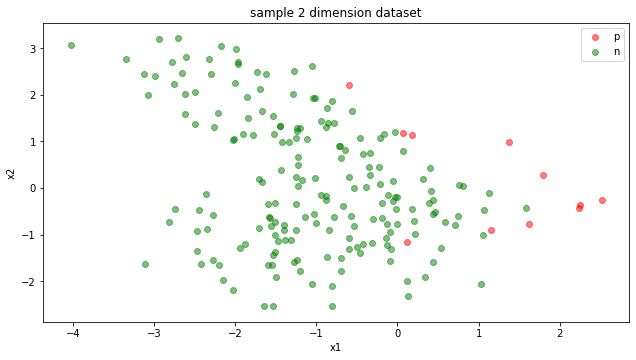

In [117]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5)

X_n = X[np.where(y==0)]
X_p = X[np.where(y==1)]

ax.scatter(x = X_p[:,0], y = X_p[:,1], c='r', alpha = 0.5, label='p')
ax.scatter(x = X_n[:,0], y = X_n[:,1], c='g', alpha = 0.5, label='n')
ax.set_title('sample 2 dimension dataset')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()

In [75]:
len(X_p), len(X_n)

(11, 189)

## Calculate distances

Calculate eucladian distance between negative sample with each positive samples

In [111]:
from scipy.spatial import distance
import pandas as pd

# create a cartision product
def cartesian_product_basic(left, right):
    return (
       left.assign(key=1).merge(right.assign(key=1), on='key').drop('key', 1))

# generate euclidean distance
def ed(x):
    s = len(x)        
    return distance.euclidean(x[1:2], x[3:4])

# take the negative samples change to dataframe, label row number for id
df_n = pd.DataFrame(X_n).reset_index()
df_n.columns = ['obs', 'x1', 'x2']

df_p = pd.DataFrame(X_p)
df_p.columns = ['x1', 'x2']

# do a cartesian join of the pos and neg samples
df_full = cartesian_product_basic(df_n, df_p)
df_full['d'] = df_full.apply(lambda x: ed(x), axis = 1)

In [126]:
# get percentile
param = .01
pct = df_full.d.quantile(param)
df_full['hit'] = df_full.d.map(lambda x: 1 if x<= pct else 0)

In [127]:
candidate = df_full[df_full.hit==1].obs.unique()

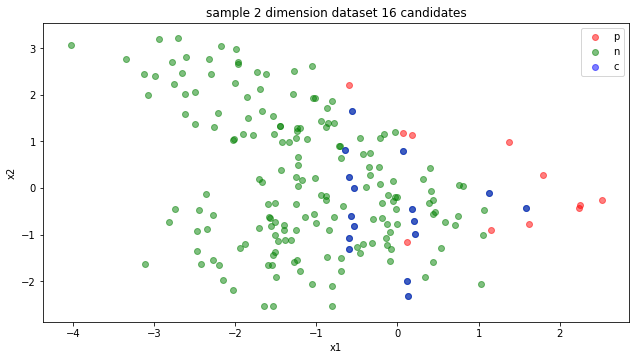

In [131]:
%matplotlib inline
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 5.5)

X_n = X[np.where(y==0)]
X_c = X[np.where(y==0)][candidate]
X_p = X[np.where(y==1)]

ax.scatter(x = X_p[:,0], y = X_p[:,1], c='r', alpha = 0.5, label='p')
ax.scatter(x = X_n[:,0], y = X_n[:,1], c='g', alpha = 0.5, label='n')
ax.scatter(x = X_c[:,0], y = X_c[:,1], c='b', alpha = 0.5, label='c')
ax.set_title(f"sample 2 dimension dataset {len(candidate)} candidates")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.legend()